In [1]:
%matplotlib inline
import os
import cv2 as cv
import numpy as np
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from skimage.io import imread
from skimage.feature import greycomatrix, greycoprops
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_as_frame = pd.read_csv("data.csv")
data_as_frame

,Contrast,Energy,Homogeneity,Correlation,Dissimilarity,ASM,Area,Perimeter,Epsilon,IsConvex,Class
0,0.458577,0.964199,0.984987,0.911907,0.070014,0.929680,2.0,5.656854,0.565685,1.0,0
1,0.331137,0.983411,0.991778,0.841892,0.045642,0.967097,0.0,0.000000,0.000000,0.0,0
2,0.397629,0.963333,0.985258,0.922795,0.064784,0.928010,2.0,5.656854,0.565685,1.0,0
3,0.247455,0.985431,0.992373,0.850843,0.037936,0.971074,0.0,0.000000,0.000000,0.0,0
4,0.302476,0.981990,0.991358,0.875217,0.045188,0.964305,0.0,2.828427,0.282843,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
215,0.222315,0.990029,0.992963,0.678673,0.034937,0.980157,4.0,7.656854,0.765685,1.0,2
216,0.145746,0.995328,0.996571,0.554976,0.019700,0.990678,39.5,33.556349,3.355635,0.0,2
217,0.133508,0.993516,0.996323,0.826756,0.019038,0.987073,0.0,0.000000,0.000000,0.0,2
218,0.208647,0.992208,0.994923,0.753233,0.028347,0.984476,2.0,5.656854,0.565685,1.0,2


In [3]:
data_as_frame['Class'].unique()

array([0, 1, 2], dtype=int64)

In [4]:
data_as_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 11 columns):
Contrast         220 non-null float64
Energy           220 non-null float64
Homogeneity      220 non-null float64
Correlation      220 non-null float64
Dissimilarity    220 non-null float64
ASM              220 non-null float64
Area             220 non-null float64
Perimeter        220 non-null float64
Epsilon          220 non-null float64
IsConvex         220 non-null float64
Class            220 non-null int64
dtypes: float64(10), int64(1)
memory usage: 19.0 KB


In [5]:
def nullAnalysis(df):
    tab_info=pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})

    tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
    tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.rename(index={0:'null values (%)'}))
    return tab_info

In [6]:
nullAnalysis(data_as_frame)

,Contrast,Energy,Homogeneity,Correlation,Dissimilarity,ASM,Area,Perimeter,Epsilon,IsConvex,Class
column type,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
null values (nb),0,0,0,0,0,0,0,0,0,0,0
null values (%),0,0,0,0,0,0,0,0,0,0,0


In [7]:
cm_plot_labels = ['benign', 'malignant', 'no_tumor']
print(cm_plot_labels)

['benign', 'malignant', 'no_tumor']


In [8]:
X = data_as_frame.drop('Class', axis=1)
Y = data_as_frame['Class']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.05, random_state = 27)

In [9]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(209, 10) (209,) (11, 10) (11,)


In [10]:
forest = RandomForestClassifier(n_estimators=50)

In [11]:
forest.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [12]:
y_pred = forest.predict(x_test)

In [13]:
y_test

120    1
125    1
65     1
171    2
8      0
109    1
48     1
90     1
122    1
214    2
154    2
Name: Class, dtype: int64

In [14]:
y_pred

array([1, 1, 1, 2, 0, 1, 1, 1, 1, 2, 2], dtype=int64)

In [15]:
def plot_confusion_matrix(cm, classes,title='Confusion matrix'):
    
    plt.imshow(cm, interpolation='nearest', cmap='YlGnBu')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

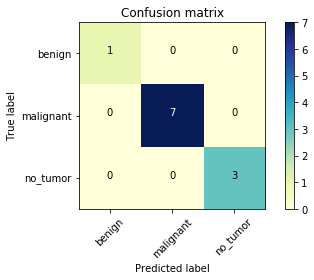

In [16]:
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
plot_confusion_matrix(cm, cm_plot_labels,title='Confusion matrix')

In [17]:
print(classification_report(y_true=y_test,y_pred=y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         3

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



In [18]:
rf_acc = accuracy_score(y_true=y_test, y_pred= y_pred)
print("Overall accuracy of training the model is : %f" %(rf_acc*100))

Overall accuracy of training the model is : 100.000000


# Save model

In [19]:
model_fname = 'model/rf_model.pkl'

In [20]:
pkl.dump(forest,open(model_fname,'wb'))

# Done